<a href="https://colab.research.google.com/github/lanonk/Gradient_Boosting_predict_houseprices/blob/main/final_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

# https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20000 non-null  int64  
 1   date           20000 non-null  object 
 2   bedrooms       20000 non-null  int64  
 3   bathrooms      20000 non-null  float64
 4   sqft_living    20000 non-null  int64  
 5   sqft_lot       20000 non-null  int64  
 6   floors         20000 non-null  float64
 7   waterfront     20000 non-null  int64  
 8   view           20000 non-null  int64  
 9   condition      20000 non-null  int64  
 10  grade          20000 non-null  int64  
 11  sqft_above     20000 non-null  int64  
 12  sqft_basement  20000 non-null  int64  
 13  yr_built       20000 non-null  int64  
 14  yr_renovated   20000 non-null  int64  
 15  zipcode        20000 non-null  int64  
 16  lat            20000 non-null  float64
 17  long           20000 non-null  float64
 18  sqft_l

In [ ]:
housing.isnull().sum(axis=0)

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [ ]:
features = housing[["bedrooms","bathrooms","sqft_living","sqft_lot","price"]]

In [ ]:
housing.head()
len(housing)

20000

In [ ]:
# import matplotlib.pyplot as plt
# features.hist(bins=10, figsize=(20,15))
# plt.show()

### Indentifying some Correlations

In [ ]:
import altair as alt
correlated_with_price = pd.DataFrame(housing.corr().price).reset_index()
# correlated_with_price
alt.Chart(correlated_with_price.drop([19])).mark_bar().encode(
    alt.Y("index", sort = "-x"),
    alt.X("price")
).properties(width=500)



alt.Chart(...)

In [ ]:
correlated_with_price.head()

,index,price
0,id,-0.016081
1,bedrooms,0.307281
2,bathrooms,0.527989
3,sqft_living,0.703920
4,sqft_lot,0.090317


In [ ]:
y = housing['price']
x = housing.drop(['price','date'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
reg = RandomForestRegressor(n_estimators = 500, random_state = 0)
reg.fit(x_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_train.mean()

537538.3835

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import datasets, ensemble
params = {'n_estimators': 700,
          'max_depth': 5,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
regs = ensemble.GradientBoostingRegressor(**params)
regs.fit(x_train, y_train)
rmse = mean_squared_error(y_test, regs.predict(x_test),squared=False)
rmse

131853.9903063739

In [ ]:
# from math import sqrt

# rms = sqrt(mean_squared_error(y_test, regs.predict(x_test))

In [ ]:
y_pred = reg.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8708415827766544

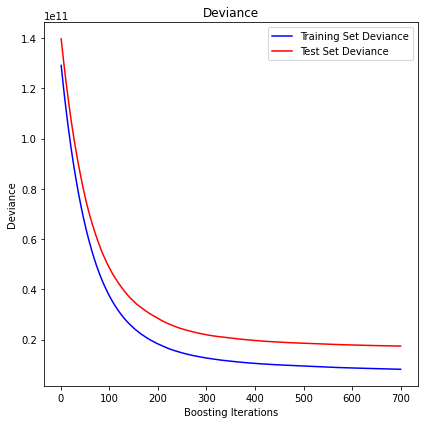

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(regs.staged_predict(x_test)):
    test_score[i] = regs.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, regs.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

### XGBRegressor

In [ ]:
from xgboost import XGBRegressor

reg1 = XGBRegressor(objective="reg:squarederror", colsample_bytree= 0.8, 
                    learning_rate= 0.095, max_depth= 5, min_child_weight= 3,
                    n_estimators= 500, nthread= 4, silent= 1, subsample= 0.8)

x1 = x
y1 = y

x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.2, random_state = 0)


reg1.fit(x_train1, y_train1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.095, max_delta_step=0,
             max_depth=5, min_child_weight=3, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.8, verbosity=1)

In [ ]:
y_pred1 = reg1.predict(x_test1)


from sklearn.metrics import r2_score
r2_score(y_test1, y_pred1)


0.9067046124564027

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import datasets, ensemble
params = {'n_estimators': 500,
          'max_depth': 9,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'colsample_bytree': 0.7,
          'loss': 'ls'}
regs1 = XGBRegressor(objective="reg:squarederror", colsample_bytree= 0.7, 
                    learning_rate= 0.095, max_depth= 5, min_child_weight= 3,
                    n_estimators= 500, nthread= 4, silent= 1, subsample= 0.8)
regs1.fit(x_train1, y_train1)
rmse = mean_squared_error(y_test1, regs1.predict(x_test1),squared=False)
rmse 

112397.33276920901

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test1, y_pred1)


62702.25300585938

In [ ]:
print(y_train1.mean())
print(y_train1.median())

y_train1.describe()

538954.5196875
450000.0


count    1.600000e+04
mean     5.389545e+05
std      3.663915e+05
min      7.500000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.400000e+05
max      7.062500e+06
Name: price, dtype: float64

In [ ]:
 p_housing = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test.csv")
 p_housing.head()
p_housing.drop(['date'],axis=1, inplace=True)

In [ ]:
pred = pd.DataFrame(reg.predict(p_housing))
# print(classifier.predict(sc.transform([[30,87000]])))
pred.head()


,0
0,364648.730
1,860396.780
2,1085447.814
3,2280075.740
4,711477.922


In [ ]:
pred.to_csv('pred.csv')

In [ ]:
len(pred)

1613